### Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
carsdf= pd.read_csv("CarPrice_Assignment.csv")
carsdf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carsdf.shape

(205, 26)

In [4]:
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
carsdf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning and Preparation

Splitting the column 'CarName' into 'car company' and 'car model'. We need to consider only company name as the independent variable for model building

In [6]:
CompanyName = carsdf['CarName'].apply(lambda x : x.split(' ')[0])
carsdf.insert(3,'CompanyName',CompanyName)
carsdf.drop(['CarName'],axis=1,inplace=True)
carsdf.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
carsdf.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some spelling errors in CompanyName column.Let us check the count of each company so that we will get to know which is the correct spelling.

In [8]:
carsdf.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
maxda           2
toyouta         1
Nissan          1
mercury         1
porcshce        1
vokswagen       1
Name: CompanyName, dtype: int64

Below are the ones with spelling errors:
1. 'toyouta' - 'toyota'
2. 'Nissan' - 'nissan' 
3. 'maxda' - 'mazda'
4. 'vw' - 'volkswagen'
5. 'vokswagen' - 'volkswagen'
6. 'porcshce' - 'porsche'

In [9]:
# converting all the values in 'CompanyName' to lowercase
carsdf['CompanyName']= carsdf['CompanyName'].str.lower()

# Replacing the mispelled values with correct company names
carsdf['CompanyName']= carsdf['CompanyName'].replace({'toyouta':'toyota', 'maxda': 'mazda', 'vw':'volkswagen', 
                                                      'vokswagen': 'volkswagen', 'porcshce': 'porsche'},regex=True)
# Check for unique values in 'CompanyName' once again
carsdf.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Visualizing the data

In [10]:
#Since, 'Price' is the independent variable let us take a look at the data present in this column
carsdf['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

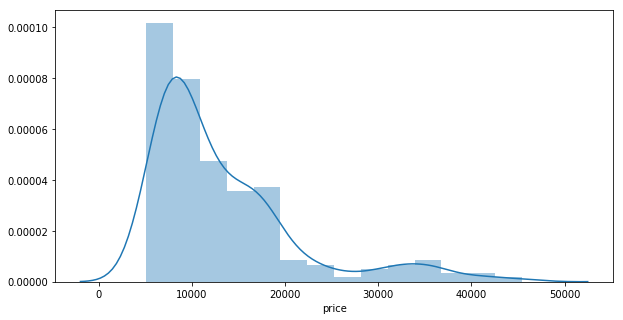

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(carsdf['price'])
plt.show()

The plot is right-skewed with most of the prices below 15,000. Also, mean is higher than the median.

### Visualizing Categorical Data
Below are the categorical varaibles in the given dataset
1. CompanyName
2. fueltype	
3. aspiration	
4. doornumber	
5. carbody	
6. drivewheel	
7. enginelocation
8. enginetype	
9. cylindernumber
10. fuelsystem

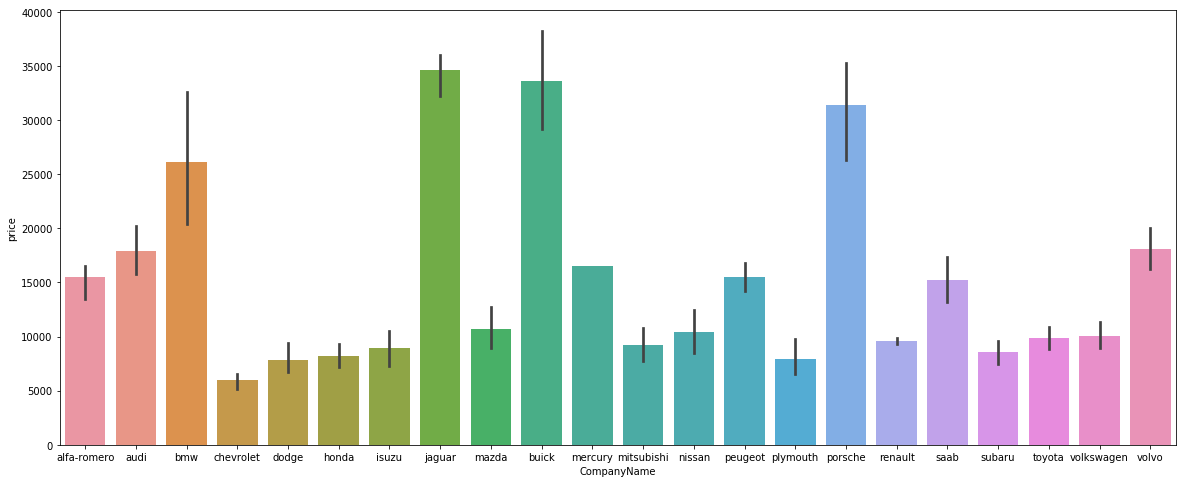

In [12]:
# Let us take a look at CompanyName versus Price
plt.figure(figsize=(20,8))
sns.barplot(x='CompanyName', y='price', data=carsdf)
plt.show()

__Observation__: 'jaguar' has the highest price, followed by 'buick' and then 'porche'

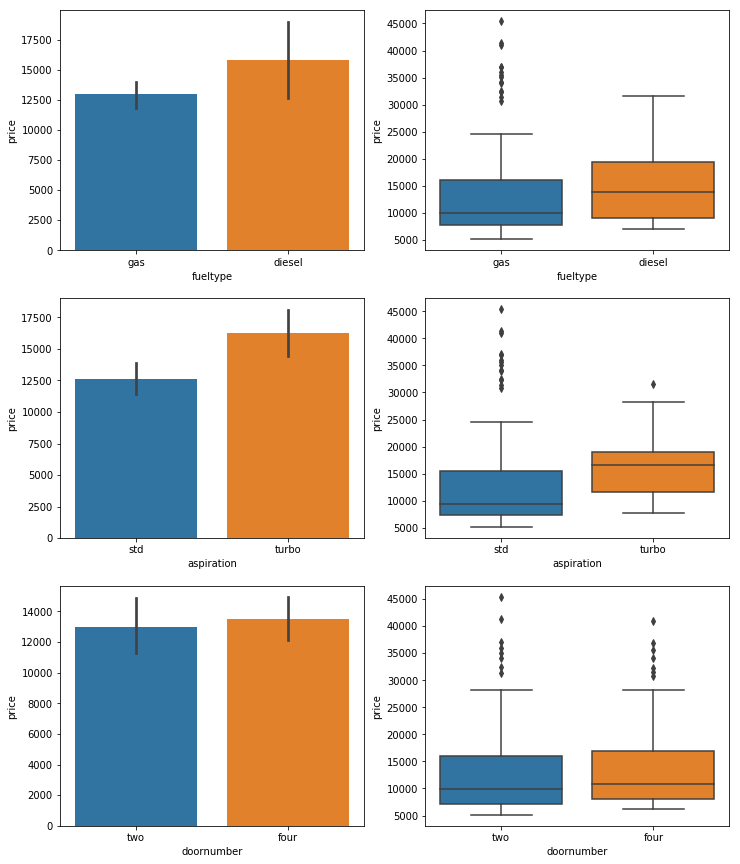

In [13]:
# Now lets see how other categorical variables are related to the price
plt.figure(figsize=(12,15))
plt.subplot(321)
sns.barplot(x='fueltype', y='price', data=carsdf)
plt.subplot(322)
sns.boxplot(x='fueltype', y='price', data=carsdf)

plt.subplot(323)
sns.barplot(x='aspiration', y='price', data=carsdf)
plt.subplot(324)
sns.boxplot(x='aspiration', y='price', data=carsdf)

plt.subplot(325)
sns.barplot(x='doornumber', y='price', data=carsdf)
plt.subplot(326)
sns.boxplot(x='doornumber', y='price', data=carsdf)

plt.show()

__Observations__:
1. __fueltype__: diesel has higher price range than gas
2. __aspiration__: turbo have higher price range compared to std. But there are some outliers present in std category
3. __doornumber__: There is no significant difference between the categories(two, four) in doornumber

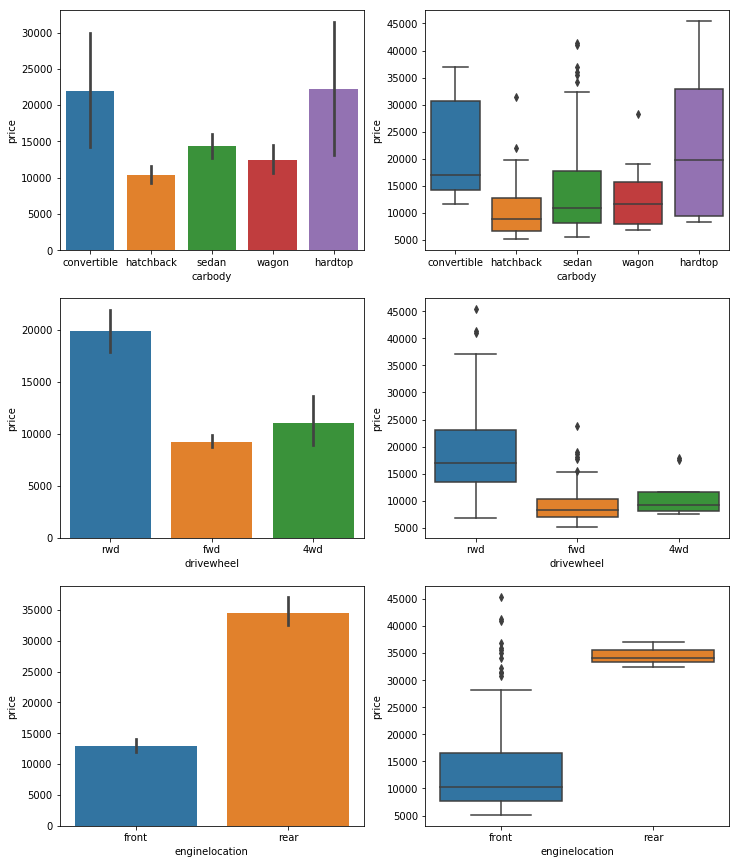

In [14]:
plt.figure(figsize=(12,15))
plt.subplot(321)
sns.barplot(x='carbody', y='price', data=carsdf)
plt.subplot(322)
sns.boxplot(x='carbody', y='price', data=carsdf)

plt.subplot(323)
sns.barplot(x='drivewheel', y='price', data=carsdf)
plt.subplot(324)
sns.boxplot(x='drivewheel', y='price', data=carsdf)

plt.subplot(325)
sns.barplot(x='enginelocation', y='price', data=carsdf)
plt.subplot(326)
sns.boxplot(x='enginelocation', y='price', data=carsdf)

plt.show()

__Observations__:
1. __carbody__: hardtop and convertible have higher prices compared to other types.
2. __drivewheel__: Most high range cars seems to prefer rwd drivewheel.
3. __enginelocation__: High price for the cars where engine is located on rear side.

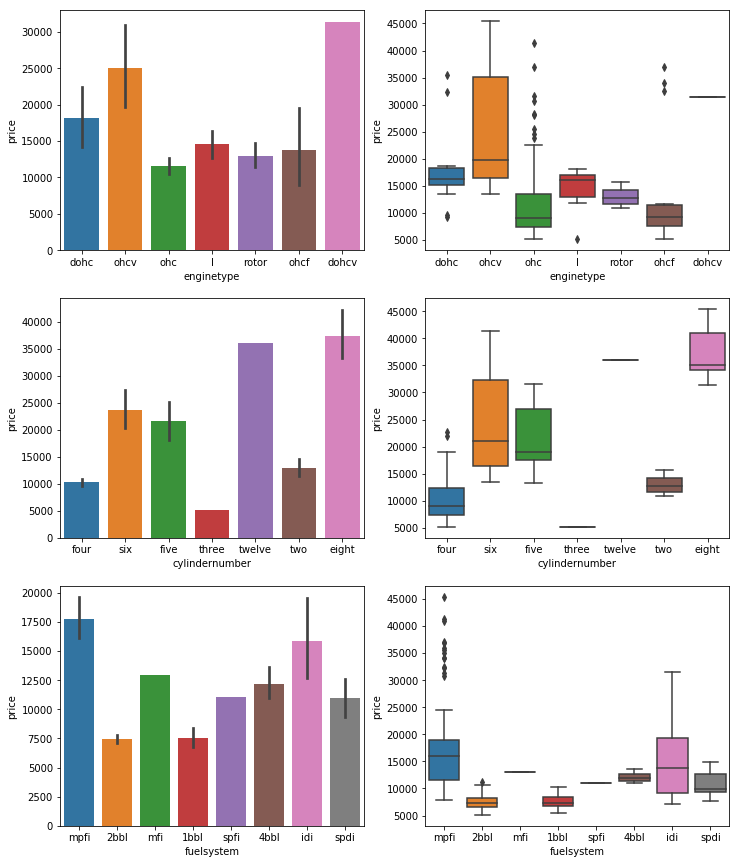

In [15]:
plt.figure(figsize=(12,15))
plt.subplot(321)
sns.barplot(x='enginetype', y='price', data=carsdf)
plt.subplot(322)
sns.boxplot(x='enginetype', y='price', data=carsdf)

plt.subplot(323)
sns.barplot(x='cylindernumber', y='price', data=carsdf)
plt.subplot(324)
sns.boxplot(x='cylindernumber', y='price', data=carsdf)

plt.subplot(325)
sns.barplot(x='fuelsystem', y='price', data=carsdf)
plt.subplot(326)
sns.boxplot(x='fuelsystem', y='price', data=carsdf)

plt.show()

__Observations__:
1. __enginetype__: ohcv has the highest price range though dohcv is the highest but has only one row. ohc has the lowest price range.
2. __cylindernumber__: eight cylinders have the highest price range.
3. __fuelsystem__: mpfi and idi have the highest price range.

### Visualizing Numerical Data
Let us visualize all the numeric variables present in dataset using pairplot.

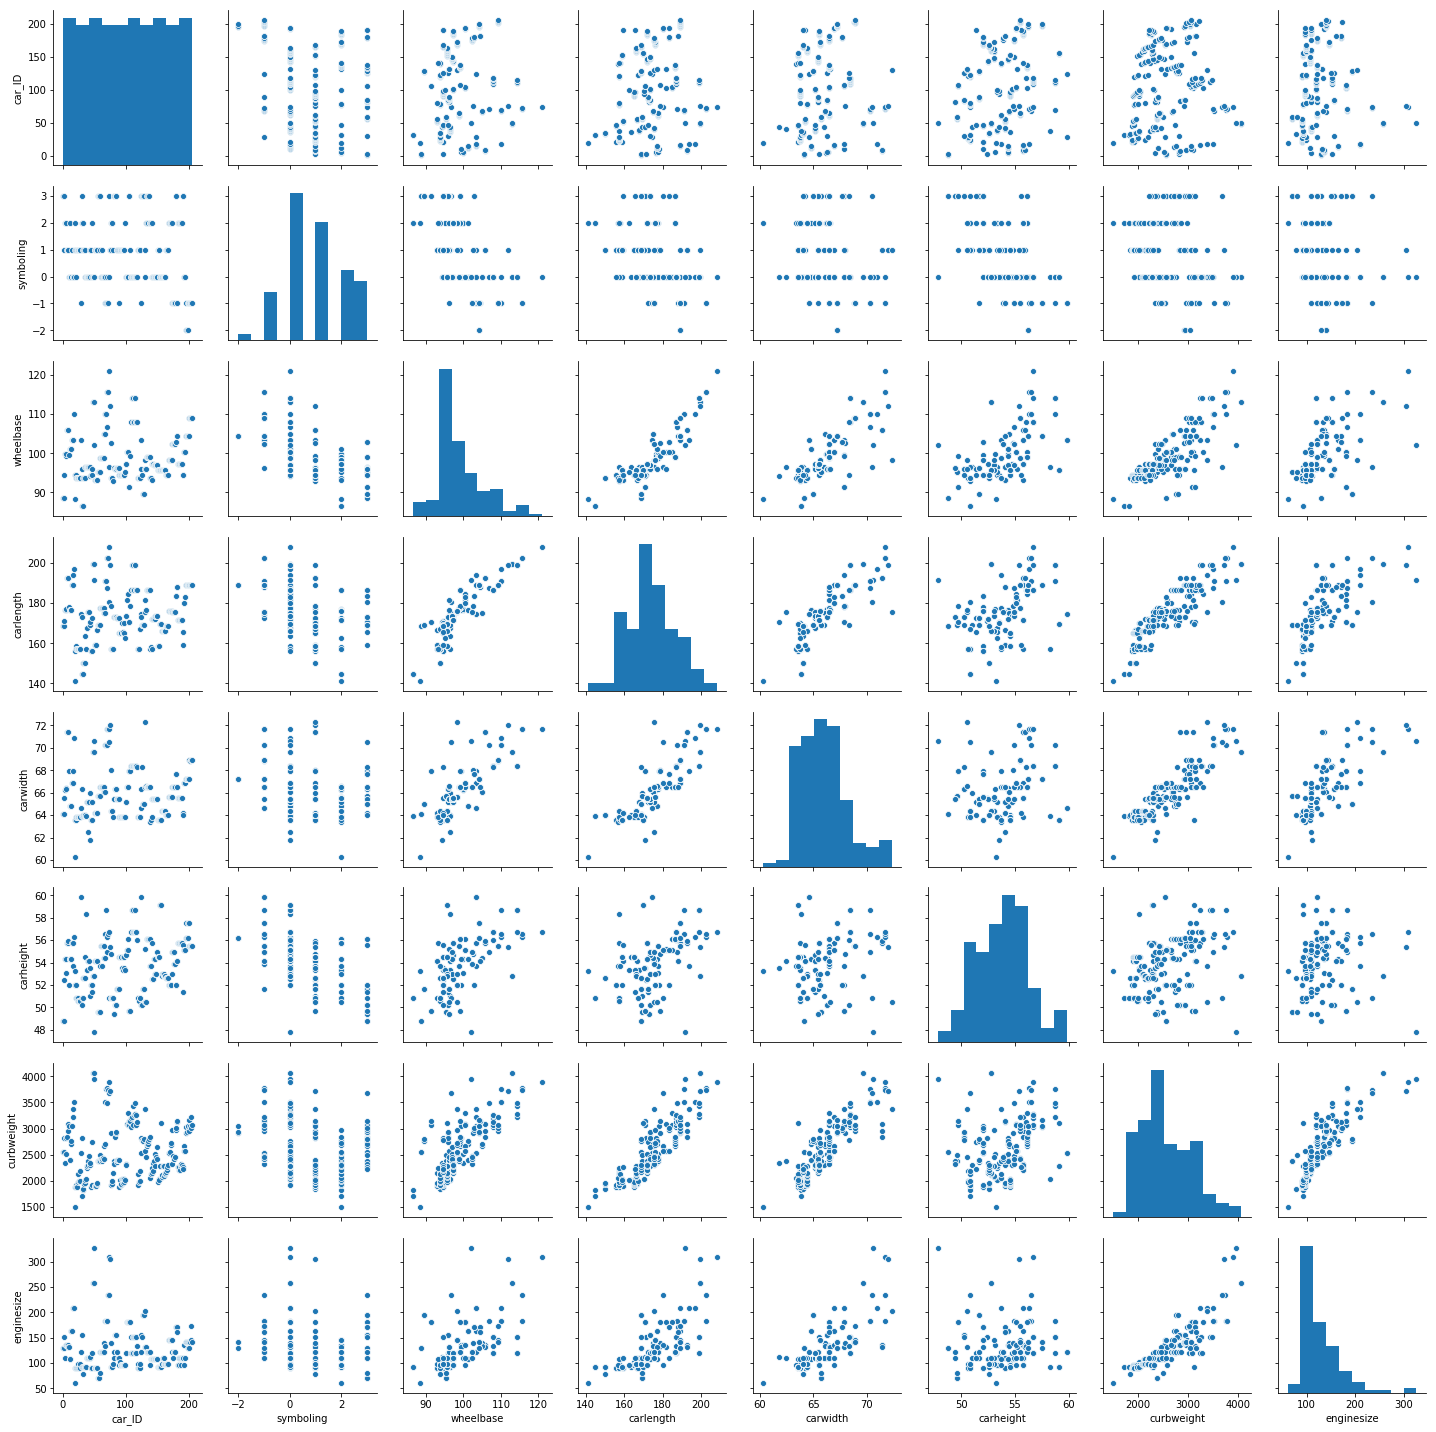

In [16]:
numvar1=['car_ID', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize']
pairplot = sns.pairplot(carsdf[numvar1])
pairplot.fig.set_size_inches(20,20)
plt.show()

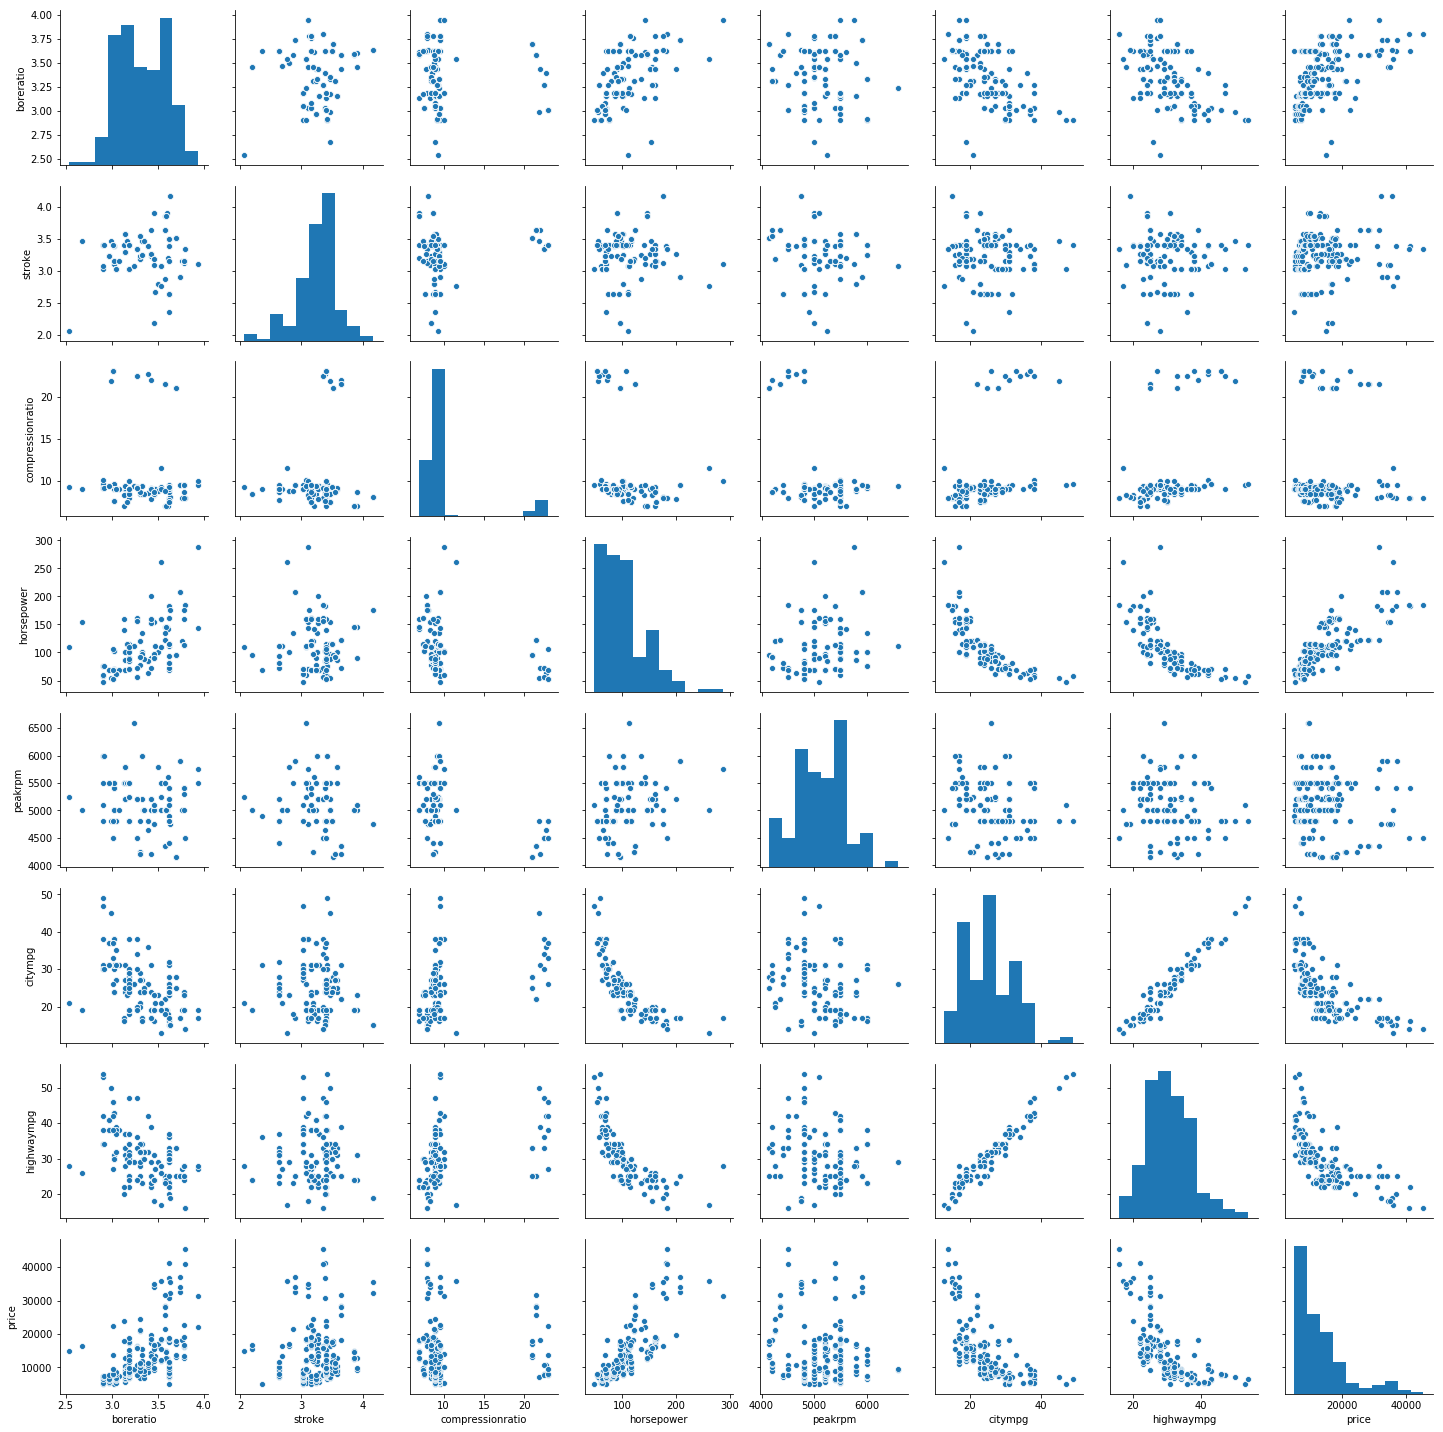

In [17]:
numvar2=['boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
pairplot = sns.pairplot(carsdf[numvar2])
pairplot.fig.set_size_inches(20,20)
plt.show()

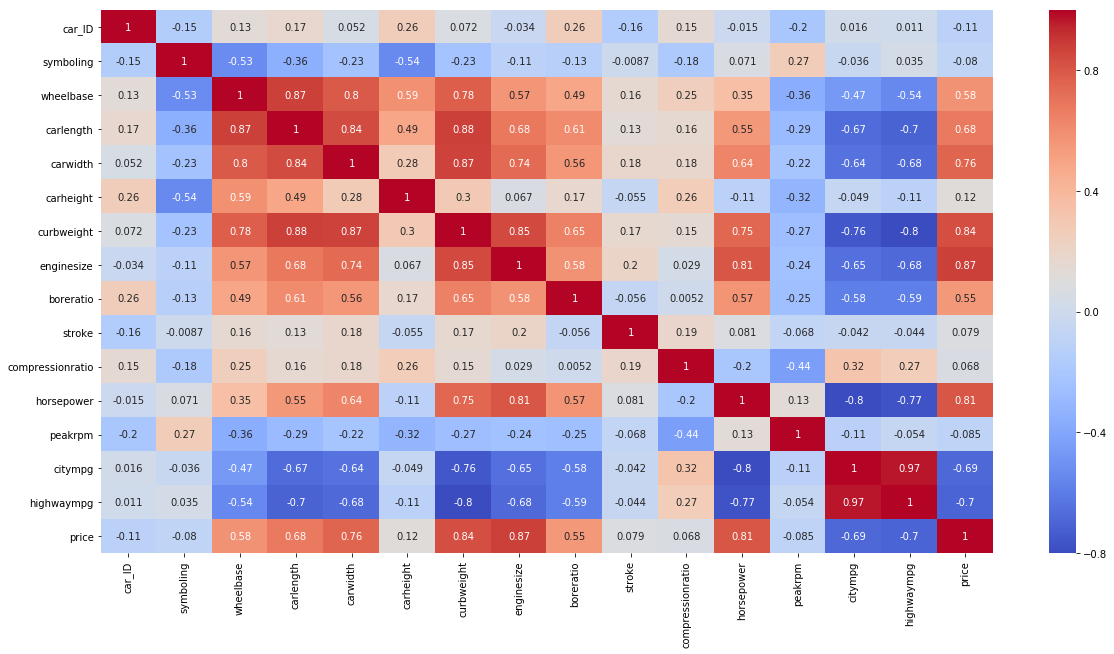

In [18]:
# Let us see the correlation plot among the numeric variables

plt.figure(figsize=(20,10))
sns.heatmap(carsdf.corr(),cmap="coolwarm",annot=True)
plt.show()

__Observations__:
1. price has a very low correlation with carheight, stroke, compressionratio
2. price has very high correlation with carwidth, crubweight, enginesize and horsepower
3. price has descent correlation with wheelbase, carlength, boreratio
4. price is negatively correlated with symboling, peakrpm, citympg and highwaympg.

### Dealing with categorical data - dummy variables
1. fueltype- 2 levels- gas,deisel
2. aspiration-2 levels- std, turbo
3. doornumber- 2 levels- two, four
4. carbody-5 levels- convertible, hatchback, sedan, wagon, hardtop
5. drivewheel- 3 levels- 4wd, rwd, fwd
6. enginelocation-2 levels- front, rear
7. enginetype-7 levels- dohc, ohcv, ohc, l, rotor, ohcf, dohcv
8. cylindernumber- 7 levels- two, three, four, five, six, eight, twelve
9. fuelsystem- 8 levels- mpfi,2bbl,mfi,1bbl,spfi,4bbl,idi,spdi

In [19]:
# Let us map the variables with 2 levels ('fueltype', 'aspiration', 'doornumber', 'enginelocation') to 0 and 1

carsdf['fueltype'] = carsdf['fueltype'].map({'diesel':0, 'gas':1})
carsdf['aspiration'] = carsdf['aspiration'].map({'turbo':0, 'std':1})
carsdf['doornumber'] = carsdf['doornumber'].map({'two':0, 'four':1})
carsdf['enginelocation'] = carsdf['enginelocation'].map({'rear':0, 'front':1})
carsdf.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,1,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,1,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# Assigning dummy variables to remaining categorical variables-'carbody','drivewheel','enginetype','cylindernumber','fuelsystem'

carsdf = pd.get_dummies(carsdf, columns=['carbody','drivewheel','enginetype','cylindernumber','fuelsystem'])
carsdf.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,1,1,0,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,1,1,1,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,1,1,1,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# let us drop the dummy variabe which is least related to price
carsdf.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)
carsdf.drop(labels = ['drivewheel_rwd'], axis = 1, inplace = True)
carsdf.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)
carsdf.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)
carsdf.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)
print(carsdf.shape)
carsdf.columns

(205, 46)


Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [22]:
#we can drop car_ID  as its just a serial number 
carsdf.drop(['car_ID'], axis =1, inplace = True)
carsdf.shape

(205, 45)

### Deriving new features

In [23]:
# Bin car companies based on range distribution
carsdf_category = carsdf.groupby(['CompanyName']).median()  #Taking median since, mean is high compared to median
carsdf_category['price']

CompanyName
alfa-romero    16500.0
audi           17710.0
bmw            22835.0
buick          32892.0
chevrolet       6295.0
dodge           7609.0
honda           7295.0
isuzu           8916.5
jaguar         35550.0
mazda          10595.0
mercury        16503.0
mitsubishi      8499.0
nissan          8124.0
peugeot        16630.0
plymouth        7609.0
porsche        32528.0
renault         9595.0
saab           15275.0
subaru          7894.0
toyota          9103.0
volkswagen      9737.5
volvo          18420.0
Name: price, dtype: float64

In [24]:
CarLabels = ['EconomicCars', 'MidTierCars', 'HighEndCars']
bins = [0, 10000, 20000, 50000]

carsdf_category = carsdf_category[['price']].join(pd.get_dummies(pd.cut(carsdf_category.price, bins, labels=CarLabels)))
carsdf_category

,price,EconomicCars,MidTierCars,HighEndCars
CompanyName,,,,
alfa-romero,16500.0,0,1,0
audi,17710.0,0,1,0
bmw,22835.0,0,0,1
buick,32892.0,0,0,1
chevrolet,6295.0,1,0,0
dodge,7609.0,1,0,0
honda,7295.0,1,0,0
isuzu,8916.5,1,0,0
jaguar,35550.0,0,0,1


In [25]:
# Let us integrate these categories into our main carsdf
HighEndCars=['bmw','buick','jaguar','porsche']
def highendcars(carcompany1):
    value1 = 0
    if carcompany1 in HighEndCars:
        value1 = 1
    else:
        value1 = 0        
    return int(value1)

carsdf['HighEndCars'] = 0
carsdf['HighEndCars'] = carsdf['CompanyName'].apply(highendcars)

In [26]:
MidTierCars = ['alfa-romero', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def midtiercars(carcompany2):
    value2 = 0
    if carcompany2 in MidTierCars:
        value2 = 1
    else:
        value2 = 0
    return int(value2)

carsdf['MidTierCars'] = 0
carsdf['MidTierCars'] = carsdf['CompanyName'].apply(midtiercars) 

carsdf.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars
0,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
1,3,alfa-romero,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
2,1,alfa-romero,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,2,audi,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,1,0,0,0,1
4,2,audi,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,1,0,0,0,1


In [27]:
# since, we have categorized the car companies into 3 categories,we can drop the 'CompanyName' column.
carsdf.drop(['CompanyName'], axis = 1, inplace=True)
carsdf.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,1


In [28]:
# 'Symboling' variable: +3 =high risk while -3 = low risk.
# So this can be categorized into 3 categories such as 'HighRisk','ModerateRisk','LowRisk'

SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]
carsdf = carsdf.join(pd.get_dummies(pd.cut(carsdf['symboling'], bins, labels=SymbolingLabels)))
carsdf.drop(labels=['HighRisk'], axis = 1, inplace = True)
carsdf.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,1,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,1,0,0,0,1,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,1,0,0,0,1,0,1


In [29]:
# Now, we can drop the symboling column.
carsdf.drop(['symboling'], axis = 1, inplace = True)
carsdf.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,1,0,0,0,1,0,1


In [30]:
#Fuel economy
carsdf['fueleconomy']= (0.55 * carsdf['citympg']) + (0.45 * carsdf['highwaympg'])
carsdf.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk,fueleconomy
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,1,0,0,23.70
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,1,0,0,23.70
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,1,0,1,22.15
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,1,0,1,26.70
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,1,0,1,19.80


In [31]:
# dropping off citympg, highwaympg as we now have a derived variable 'fueleconomy'
carsdf.drop(['citympg','highwaympg'], axis =1, inplace = True)
carsdf.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk,fueleconomy
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,1,0,0,23.70
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,1,0,0,23.70
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,1,0,1,22.15
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,1,0,1,26.70
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,1,0,1,19.80


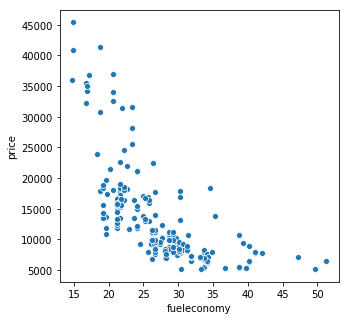

In [32]:
#Let us plot fueleconomy versus price
plt.figure(figsize=(5,5))
sns.scatterplot(carsdf['fueleconomy'],carsdf['price'])
plt.show()

__Observation__: Fuel Economy has negative correlation with Price

### Splitting the Data into Training and Testing Sets

In [33]:
df_train, df_test = train_test_split(carsdf, train_size = 0.7, random_state = 100)

### Rescaling the Features using Min-Max Scaling

In [34]:
scaler = MinMaxScaler()
num_vars = ['wheelbase','carwidth', 'carlength','carheight','curbweight', 'enginesize', 'boreratio',
            'stroke','compressionratio','horsepower','peakrpm','fueleconomy','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk,fueleconomy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.265734,0.013986,0.860140,0.358265
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.443276,0.117845,0.348061,0.185980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.198903
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.344307
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.512346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [36]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 11),
 ('aspiration', False, 13),
 ('doornumber', False, 27),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 28),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', True, 1),
 ('peakrpm', False, 7),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 26),
 ('carbody_sedan', False, 22),
 ('carbody_wagon', False, 29),
 ('drivewheel_4wd', False, 25),
 ('drivewheel_fwd', False, 18),
 ('enginetype_dohc', False, 23),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 24),
 ('enginetype_ohc', False, 4),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 14),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 17),
 ('f

In [38]:
finalcol= X_train.columns[rfe.support_]
finalcol

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'carbody_convertible', 'enginetype_dohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'HighEndCars'],
      dtype='object')

## Model Building
### Model 1

In [39]:
# Let us create the train data set with the final consolidated columns.
X_train_1 = X_train[finalcol]

X_train_sm1 = sm.add_constant(X_train_1)
lr_model1= sm.OLS(y_train, X_train_sm1).fit() 
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           4.96e-68
Time:                        17:38:30   Log-Likelihood:                 213.29
No. Observations:                 143   AIC:                            -394.6
Df Residuals:                     127   BIC:                            -347.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2809      0.088      3.202      0.002       0.107       0.454
enginelocation           -0.2261      0.066     -3.423      0.001      -0.357      -0.095
carwidth                  0.3464      0.067      5.145      0.000       0.213       0.480
curbweight                0.2162      0.074      2.932      0.004       0.070       0.362
enginesize                0.3893      0.224      1.737      0.085      -0.054       0.833
boreratio                -0.1582      0.070     -2.261      0.025      -0.297      -0.020
stroke                   -0.1208      0.064     -1.892      0.061      -0.247       0.006
horsepower                0.2597      0.071      3.648      0.000       0.119       0.401
carbody_convertible       0.0895      0.034      2.601      0.010       0.021       0.158
enginetype_dohcv         -0.0873      0.093     -0.937      0.351      -0.272       0.097
cylindernumber_eight     -0.2426      0.122     -1.995      0.048      -0.483      -0.002
cylindernumber_five      -0.1401      0.061     -2.306      0.023      -0.260      -0.020
cylindernumber_four      -0.1180      0.040     -2.916      0.004      -0.198      -0.038
cylindernumber_six       -0.1586      0.080     -1.980      0.050      -0.317      -0.000
cylindernumber_twelve    -0.4269      0.205     -2.078      0.040      -0.833      -0.020
HighEndCars               0.2434      0.023     10.503      0.000       0.198       0.289
==============================================================================
Omnibus:                       77.912   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.267
Skew:                           1.871   Prob(JB):                     1.38e-99
Kurtosis:                      10.900   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF
vif_1=pd.DataFrame()
vif_1['Features']=X_train_1.columns
vif_1['VIF']= [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif_1['VIF']= round(vif_1['VIF'],2)
vif_1= vif_1.sort_values(by='VIF',ascending=False)
vif_1

,Features,VIF
3,enginesize,126.37
0,enginelocation,90.41
2,curbweight,48.97
1,carwidth,47.43
4,boreratio,41.89
5,stroke,39.13
11,cylindernumber_four,32.53
12,cylindernumber_six,23.38
6,horsepower,16.07
9,cylindernumber_eight,9.42


### Model 2
From the summary of Model 1, '__enginetype_dohcv__' has a high p-value(0.351) and is insignificant. Let us drop it and rebuild the model

In [41]:
X_train_2= X_train_1.drop(['enginetype_dohcv'],axis=1)

X_train_sm2 = sm.add_constant(X_train_2)
lr_model2= sm.OLS(y_train, X_train_sm2).fit() 
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.52e-69
Time:                        17:38:30   Log-Likelihood:                 212.79
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     128   BIC:                            -351.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3118      0.081      3.837      0.000       0.151       0.473
enginelocation           -0.2345      0.065     -3.584      0.000      -0.364      -0.105
carwidth                  0.3475      0.067      5.165      0.000       0.214       0.481
curbweight                0.2199      0.074      2.988      0.003       0.074       0.365
enginesize                0.4766      0.204      2.340      0.021       0.074       0.880
boreratio                -0.1824      0.065     -2.806      0.006      -0.311      -0.054
stroke                   -0.1406      0.060     -2.335      0.021      -0.260      -0.021
horsepower                0.2307      0.064      3.600      0.000       0.104       0.358
carbody_convertible       0.0913      0.034      2.659      0.009       0.023       0.159
cylindernumber_eight     -0.3033      0.103     -2.948      0.004      -0.507      -0.100
cylindernumber_five      -0.1599      0.057     -2.810      0.006      -0.273      -0.047
cylindernumber_four      -0.1317      0.038     -3.492      0.001      -0.206      -0.057
cylindernumber_six       -0.1852      0.075     -2.473      0.015      -0.333      -0.037
cylindernumber_twelve    -0.4894      0.194     -2.520      0.013      -0.874      -0.105
HighEndCars               0.2397      0.023     10.502      0.000       0.195       0.285
==============================================================================
Omnibus:                       77.568   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.548
Skew:                           1.861   Prob(JB):                     5.38e-99
Kurtosis:                      10.880   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# VIF
vif_2=pd.DataFrame()
vif_2['Features']=X_train_2.columns
vif_2['VIF']= [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif_2['VIF']= round(vif_2['VIF'],2)
vif_2= vif_2.sort_values(by='VIF',ascending=False)
vif_2

,Features,VIF
3,enginesize,116.82
0,enginelocation,86.52
2,curbweight,48.70
1,carwidth,47.40
4,boreratio,40.09
5,stroke,38.03
10,cylindernumber_four,31.48
11,cylindernumber_six,22.68
6,horsepower,13.75
12,cylindernumber_twelve,9.10


### Model 3
Looking at Model 2, '__enginesize__' and '__stroke__' both has p-value of 0.021. But, enginesize has also high VIF of 116.82. Hence we can drop enginesize column and rebuild the model

In [43]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

X_train_sm3 = sm.add_constant(X_train_3)
lr_model3= sm.OLS(y_train, X_train_sm3).fit() 
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           7.80e-69
Time:                        17:38:30   Log-Likelihood:                 209.80
No. Observations:                 143   AIC:                            -391.6
Df Residuals:                     129   BIC:                            -350.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2270      0.074      3.068      0.003       0.081       0.373
enginelocation           -0.2529      0.066     -3.828      0.000      -0.384      -0.122
carwidth                  0.3259      0.068      4.807      0.000       0.192       0.460
curbweight                0.3086      0.064      4.812      0.000       0.182       0.436
boreratio                -0.0700      0.045     -1.572      0.118      -0.158       0.018
stroke                   -0.0316      0.039     -0.813      0.418      -0.108       0.045
horsepower                0.2084      0.064      3.233      0.002       0.081       0.336
carbody_convertible       0.1217      0.032      3.761      0.000       0.058       0.186
cylindernumber_eight     -0.1062      0.060     -1.767      0.080      -0.225       0.013
cylindernumber_five      -0.0608      0.039     -1.573      0.118      -0.137       0.016
cylindernumber_four      -0.0695      0.027     -2.553      0.012      -0.123      -0.016
cylindernumber_six       -0.0312      0.036     -0.859      0.392      -0.103       0.041
cylindernumber_twelve    -0.0800      0.086     -0.932      0.353      -0.250       0.090
HighEndCars               0.2557      0.022     11.546      0.000       0.212       0.299
==============================================================================
Omnibus:                       76.048   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.471
Skew:                           1.802   Prob(JB):                     1.25e-99
Kurtosis:                      10.966   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# VIF
vif_3=pd.DataFrame()
vif_3['Features']=X_train_3.columns
vif_3['VIF']= [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif_3['VIF']= round(vif_3['VIF'],2)
vif_3= vif_3.sort_values(by='VIF',ascending=False)
vif_3

,Features,VIF
1,carwidth,46.91
0,enginelocation,41.80
2,curbweight,34.23
3,boreratio,22.24
9,cylindernumber_four,19.57
4,stroke,18.58
5,horsepower,13.09
10,cylindernumber_six,6.42
8,cylindernumber_five,3.55
7,cylindernumber_eight,3.08


### Model 4
Looking at summary of Model 3, we see that '__stroke__' has high p-value of 0.418 Hence, we can drop it and rebuild the model.

In [45]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

X_train_sm4 = sm.add_constant(X_train_4)
lr_model4= sm.OLS(y_train, X_train_sm4).fit() 
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.67e-70
Time:                        17:38:30   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -392.9
Df Residuals:                     130   BIC:                            -354.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2144      0.072      2.968      0.004       0.071       0.357
enginelocation           -0.2558      0.066     -3.883      0.000      -0.386      -0.125
carwidth                  0.3155      0.067      4.745      0.000       0.184       0.447
curbweight                0.2988      0.063      4.750      0.000       0.174       0.423
boreratio                -0.0524      0.039     -1.348      0.180      -0.129       0.024
horsepower                0.1979      0.063      3.138      0.002       0.073       0.323
carbody_convertible       0.1248      0.032      3.889      0.000       0.061       0.188
cylindernumber_eight     -0.0918      0.057     -1.601      0.112      -0.205       0.022
cylindernumber_five      -0.0564      0.038     -1.476      0.142      -0.132       0.019
cylindernumber_four      -0.0698      0.027     -2.569      0.011      -0.124      -0.016
cylindernumber_six       -0.0257      0.036     -0.720      0.473      -0.096       0.045
cylindernumber_twelve    -0.0547      0.080     -0.685      0.495      -0.213       0.103
HighEndCars               0.2524      0.022     11.608      0.000       0.209       0.295
==============================================================================
Omnibus:                       75.115   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.414
Skew:                           1.784   Prob(JB):                     3.82e-96
Kurtosis:                      10.812   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# VIF
vif_4=pd.DataFrame()
vif_4['Features']=X_train_4.columns
vif_4['VIF']= [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif_4['VIF']= round(vif_4['VIF'],2)
vif_4= vif_4.sort_values(by='VIF',ascending=False)
vif_4

,Features,VIF
1,carwidth,45.37
2,curbweight,33.47
0,enginelocation,31.19
8,cylindernumber_four,19.37
3,boreratio,17.57
4,horsepower,12.27
9,cylindernumber_six,6.31
7,cylindernumber_five,3.52
6,cylindernumber_eight,2.85
11,HighEndCars,2.29


### Model 5
Looking at summary of Model 4, we see that '__cylindernumber_twelve__' has high p-value of 0.495 Hence, we can drop it and rebuild the model.

In [47]:
X_train_5 = X_train_4.drop(['cylindernumber_twelve'], axis = 1)

X_train_sm5 = sm.add_constant(X_train_5)
lr_model5= sm.OLS(y_train, X_train_sm5).fit() 
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.35e-71
Time:                        17:38:30   Log-Likelihood:                 209.17
No. Observations:                 143   AIC:                            -394.3
Df Residuals:                     131   BIC:                            -358.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2129      0.072      2.955      0.004       0.070       0.355
enginelocation          -0.2586      0.066     -3.940      0.000      -0.388      -0.129
carwidth                 0.3139      0.066      4.733      0.000       0.183       0.445
curbweight               0.2937      0.062      4.711      0.000       0.170       0.417
boreratio               -0.0430      0.036     -1.185      0.238      -0.115       0.029
horsepower               0.1791      0.057      3.160      0.002       0.067       0.291
carbody_convertible      0.1247      0.032      3.894      0.000       0.061       0.188
cylindernumber_eight    -0.0727      0.050     -1.454      0.148      -0.172       0.026
cylindernumber_five     -0.0451      0.034     -1.311      0.192      -0.113       0.023
cylindernumber_four     -0.0646      0.026     -2.481      0.014      -0.116      -0.013
cylindernumber_six      -0.0122      0.030     -0.411      0.682      -0.071       0.046
HighEndCars              0.2481      0.021     11.942      0.000       0.207       0.289
==============================================================================
Omnibus:                       76.925   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.853
Skew:                           1.824   Prob(JB):                    1.14e-101
Kurtosis:                      11.044   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# VIF
vif_5=pd.DataFrame()
vif_5['Features']=X_train_5.columns
vif_5['VIF']= [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif_5['VIF']= round(vif_5['VIF'],2)
vif_5= vif_5.sort_values(by='VIF',ascending=False)
vif_5

,Features,VIF
1,carwidth,45.32
2,curbweight,33.02
0,enginelocation,29.82
8,cylindernumber_four,17.73
3,boreratio,15.37
4,horsepower,9.72
9,cylindernumber_six,4.24
7,cylindernumber_five,2.83
6,cylindernumber_eight,2.18
10,HighEndCars,2.09


### Model 6
Looking at summary of Model 5, we see that '__cylindernumber_six__' has high p-value of 0.682 Hence, we can drop it and rebuild the model.

In [49]:
X_train_6 = X_train_5.drop(['cylindernumber_six'], axis = 1)
X_train_sm6 = sm.add_constant(X_train_6)
lr_model6= sm.OLS(y_train, X_train_sm6).fit() 
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.57e-72
Time:                        17:38:30   Log-Likelihood:                 209.08
No. Observations:                 143   AIC:                            -396.2
Df Residuals:                     132   BIC:                            -363.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2023      0.067      3.017      0.003       0.070       0.335
enginelocation          -0.2549      0.065     -3.933      0.000      -0.383      -0.127
carwidth                 0.3149      0.066      4.765      0.000       0.184       0.446
curbweight               0.2876      0.060      4.763      0.000       0.168       0.407
boreratio               -0.0397      0.035     -1.125      0.263      -0.109       0.030
horsepower               0.1776      0.056      3.149      0.002       0.066       0.289
carbody_convertible      0.1250      0.032      3.915      0.000       0.062       0.188
cylindernumber_eight    -0.0626      0.043     -1.443      0.151      -0.148       0.023
cylindernumber_five     -0.0360      0.026     -1.374      0.172      -0.088       0.016
cylindernumber_four     -0.0573      0.019     -3.003      0.003      -0.095      -0.020
HighEndCars              0.2473      0.021     11.988      0.000       0.207       0.288
==============================================================================
Omnibus:                       75.076   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.974
Skew:                           1.783   Prob(JB):                     4.77e-96
Kurtosis:                      10.808   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# VIF
vif_6=pd.DataFrame()
vif_6['Features']=X_train_6.columns
vif_6['VIF']= [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif_6['VIF']= round(vif_6['VIF'],2)
vif_6= vif_6.sort_values(by='VIF',ascending=False)
vif_6

,Features,VIF
1,carwidth,45.24
2,curbweight,31.89
0,enginelocation,22.36
3,boreratio,14.95
8,cylindernumber_four,10.81
4,horsepower,9.39
9,HighEndCars,2.04
7,cylindernumber_five,1.79
6,cylindernumber_eight,1.63
5,carbody_convertible,1.20


### Model 7
Looking at summary of Model 6, we see that '__boreratio__' has high p-value of 0.263. Hence, we can drop it and rebuild the model.

In [51]:
X_train_7 = X_train_6.drop(['boreratio'], axis = 1)
X_train_sm7 = sm.add_constant(X_train_7)
lr_model7= sm.OLS(y_train, X_train_sm7).fit() 
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.44e-73
Time:                        17:38:31   Log-Likelihood:                 208.40
No. Observations:                 143   AIC:                            -396.8
Df Residuals:                     133   BIC:                            -367.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1930      0.067      2.898      0.004       0.061       0.325
enginelocation          -0.2432      0.064     -3.798      0.000      -0.370      -0.117
carwidth                 0.3011      0.065      4.632      0.000       0.173       0.430
curbweight               0.2710      0.059      4.623      0.000       0.155       0.387
horsepower               0.1658      0.055      2.989      0.003       0.056       0.275
carbody_convertible      0.1235      0.032      3.867      0.000       0.060       0.187
cylindernumber_eight    -0.0575      0.043     -1.332      0.185      -0.143       0.028
cylindernumber_five     -0.0329      0.026     -1.261      0.209      -0.084       0.019
cylindernumber_four     -0.0658      0.018     -3.742      0.000      -0.101      -0.031
HighEndCars              0.2446      0.021     11.927      0.000       0.204       0.285
==============================================================================
Omnibus:                       71.333   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.357
Skew:                           1.696   Prob(JB):                     3.83e-86
Kurtosis:                      10.384   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF
vif_7=pd.DataFrame()
vif_7['Features']=X_train_7.columns
vif_7['VIF']= [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif_7['VIF']= round(vif_7['VIF'],2)
vif_7= vif_7.sort_values(by='VIF',ascending=False)
vif_7

,Features,VIF
1,carwidth,43.72
2,curbweight,30.14
0,enginelocation,21.98
3,horsepower,8.84
7,cylindernumber_four,8.78
8,HighEndCars,1.99
6,cylindernumber_five,1.78
5,cylindernumber_eight,1.60
4,carbody_convertible,1.19


### Model 8
Looking at summary of Model 7, we see that '__cylindernumber_five__' has a p-value of 0.209. Hence, we can drop this column and rebuild the model.

In [53]:
X_train_8 = X_train_7.drop(['cylindernumber_five'], axis = 1)
X_train_sm8 = sm.add_constant(X_train_8)
lr_model8= sm.OLS(y_train, X_train_sm8).fit() 
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.20e-73
Time:                        17:38:31   Log-Likelihood:                 207.55
No. Observations:                 143   AIC:                            -397.1
Df Residuals:                     134   BIC:                            -370.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1863      0.067      2.800      0.006       0.055       0.318
enginelocation          -0.2409      0.064     -3.755      0.000      -0.368      -0.114
carwidth                 0.2667      0.059      4.511      0.000       0.150       0.384
curbweight               0.2855      0.058      4.954      0.000       0.172       0.399
horsepower               0.1861      0.053      3.500      0.001       0.081       0.291
carbody_convertible      0.1195      0.032      3.753      0.000       0.057       0.182
cylindernumber_eight    -0.0439      0.042     -1.047      0.297      -0.127       0.039
cylindernumber_four     -0.0555      0.016     -3.555      0.001      -0.086      -0.025
HighEndCars              0.2442      0.021     11.884      0.000       0.204       0.285
==============================================================================
Omnibus:                       74.023   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.356
Skew:                           1.752   Prob(JB):                     2.15e-94
Kurtosis:                      10.753   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# VIF
vif_8=pd.DataFrame()
vif_8['Features']=X_train_8.columns
vif_8['VIF']= [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif_8['VIF']= round(vif_8['VIF'],2)
vif_8= vif_8.sort_values(by='VIF',ascending=False)
vif_8

,Features,VIF
1,carwidth,35.96
2,curbweight,28.90
0,enginelocation,21.62
3,horsepower,8.14
6,cylindernumber_four,6.91
7,HighEndCars,1.99
5,cylindernumber_eight,1.49
4,carbody_convertible,1.18


### Model 9
Looking at summary of Model 8, we see that '__cylindernumber_eight__' has a p-value of 0.297 . Hence, we can drop it and rebuild the model.

In [55]:
X_train_9 = X_train_8.drop(['cylindernumber_eight'], axis = 1)
X_train_sm9 = sm.add_constant(X_train_9)
lr_model9= sm.OLS(y_train, X_train_sm9).fit() 
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     255.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.24e-74
Time:                        17:38:31   Log-Likelihood:                 206.97
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     135   BIC:                            -374.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1984      0.066      3.025      0.003       0.069       0.328
enginelocation         -0.2483      0.064     -3.893      0.000      -0.374      -0.122
carwidth                0.2476      0.056      4.401      0.000       0.136       0.359
curbweight              0.3028      0.055      5.482      0.000       0.194       0.412
horsepower              0.1758      0.052      3.364      0.001       0.072       0.279
carbody_convertible     0.1090      0.030      3.605      0.000       0.049       0.169
cylindernumber_four    -0.0561      0.016     -3.596      0.000      -0.087      -0.025
HighEndCars             0.2379      0.020     12.097      0.000       0.199       0.277
==============================================================================
Omnibus:                       77.797   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.422
Skew:                           1.831   Prob(JB):                    1.95e-107
Kurtosis:                      11.311   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# VIF
vif_9=pd.DataFrame()
vif_9['Features']=X_train_9.columns
vif_9['VIF']= [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif_9['VIF']= round(vif_9['VIF'],2)
vif_9= vif_9.sort_values(by='VIF',ascending=False)
vif_9

,Features,VIF
1,carwidth,32.56
2,curbweight,26.71
0,enginelocation,21.16
3,horsepower,7.99
5,cylindernumber_four,6.91
6,HighEndCars,1.85
4,carbody_convertible,1.06


### Model 10
Looking at summary of Model 9, we see that '__carwidth__' has high VIF of 32.56 . Hence, we can drop it and rebuild the model.

In [57]:
X_train_10 = X_train_9.drop(['carwidth'], axis = 1)
X_train_sm10 = sm.add_constant(X_train_10)
lr_model10= sm.OLS(y_train, X_train_sm10).fit() 
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.11e-72
Time:                        17:38:31   Log-Likelihood:                 197.38
No. Observations:                 143   AIC:                            -380.8
Df Residuals:                     136   BIC:                            -360.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1929      0.070      2.762      0.007       0.055       0.331
enginelocation         -0.2027      0.067     -3.023      0.003      -0.335      -0.070
curbweight              0.4765      0.041     11.580      0.000       0.395       0.558
horsepower              0.1971      0.055      3.555      0.001       0.087       0.307
carbody_convertible     0.0893      0.032      2.805      0.006       0.026       0.152
cylindernumber_four    -0.0575      0.017     -3.459      0.001      -0.090      -0.025
HighEndCars             0.2408      0.021     11.498      0.000       0.199       0.282
==============================================================================
Omnibus:                       54.305   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.353
Skew:                           1.350   Prob(JB):                     3.46e-46
Kurtosis:                       8.277   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# VIF
vif_10=pd.DataFrame()
vif_10['Features']=X_train_10.columns
vif_10['VIF']= [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif_10['VIF']= round(vif_10['VIF'],2)
vif_10= vif_10.sort_values(by='VIF',ascending=False)
vif_10

,Features,VIF
0,enginelocation,17.63
1,curbweight,12.99
2,horsepower,7.92
4,cylindernumber_four,6.91
5,HighEndCars,1.85
3,carbody_convertible,1.04


### Model 11
Looking at summary of Model 10, we see that '__enginelocation__' has VIF of 17.63. Hence, we can drop it and rebuild the model.

In [59]:
X_train_11 = X_train_10.drop(['enginelocation'], axis = 1)
X_train_sm11 = sm.add_constant(X_train_11)
lr_model11= sm.OLS(y_train, X_train_sm11).fit() 
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           2.79e-71
Time:                        17:38:31   Log-Likelihood:                 192.73
No. Observations:                 143   AIC:                            -373.5
Df Residuals:                     137   BIC:                            -355.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0066      0.024     -0.278      0.781      -0.053       0.040
curbweight              0.4450      0.041     10.861      0.000       0.364       0.526
horsepower              0.2380      0.055      4.300      0.000       0.129       0.347
carbody_convertible     0.0865      0.033      2.639      0.009       0.022       0.151
cylindernumber_four    -0.0570      0.017     -3.332      0.001      -0.091      -0.023
HighEndCars             0.2531      0.021     11.971      0.000       0.211       0.295
==============================================================================
Omnibus:                       46.908   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.384
Skew:                           1.262   Prob(JB):                     4.00e-30
Kurtosis:                       7.044   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# VIF
vif_11=pd.DataFrame()
vif_11['Features']=X_train_11.columns
vif_11['VIF']= [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif_11['VIF']= round(vif_11['VIF'],2)
vif_11= vif_11.sort_values(by='VIF',ascending=False)
vif_11

,Features,VIF
0,curbweight,9.68
1,horsepower,7.52
3,cylindernumber_four,2.15
4,HighEndCars,1.84
2,carbody_convertible,1.04


### Model 12
Both curbweight and horsepower have vif greater than 5. But, if I drop curbweight, R square value is dropping drastically. Hence, dropping horsepower and rebuilding the model.

In [61]:
X_train_12 = X_train_11.drop(['horsepower'], axis = 1)
X_train_sm12 = sm.add_constant(X_train_12)
lr_model12= sm.OLS(y_train, X_train_sm12).fit() 
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     320.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.36e-69
Time:                        17:38:31   Log-Likelihood:                 183.68
No. Observations:                 143   AIC:                            -357.4
Df Residuals:                     138   BIC:                            -342.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0259      0.024      1.093      0.276      -0.021       0.073
curbweight              0.5426      0.036     14.982      0.000       0.471       0.614
carbody_convertible     0.0910      0.035      2.617      0.010       0.022       0.160
cylindernumber_four    -0.0837      0.017     -4.947      0.000      -0.117      -0.050
HighEndCars             0.2657      0.022     11.954      0.000       0.222       0.310
==============================================================================
Omnibus:                       42.872   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.028
Skew:                           1.087   Prob(JB):                     2.38e-31
Kurtosis:                       7.352   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# VIF
vif_12=pd.DataFrame()
vif_12['Features']=X_train_12.columns
vif_12['VIF']= [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif_12['VIF']= round(vif_12['VIF'],2)
vif_12= vif_12.sort_values(by='VIF',ascending=False)
vif_12

,Features,VIF
0,curbweight,2.96
2,cylindernumber_four,2.08
3,HighEndCars,1.80
1,carbody_convertible,1.04


Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual analysis of training data

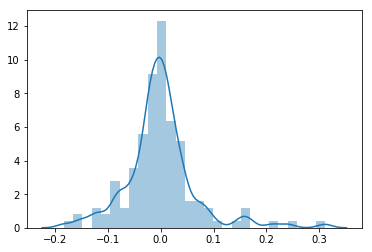

In [63]:
y_train_pred= lr_model12.predict(X_train_sm12)
res= y_train- y_train_pred
sns.distplot(res)

In [64]:
r2_score(y_train, y_train_pred)

0.9028920944368952

### Making Predictions Using the Final Model on test data

In [65]:
df_train, df_test = train_test_split(carsdf, train_size = 0.7, random_state = 100)

In [66]:
# Applying the scaling on the test sets
num_vars = ['wheelbase','carwidth', 'carlength','carheight','curbweight', 'enginesize', 'boreratio',
            'stroke','compressionratio','horsepower','peakrpm','fueleconomy','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk,fueleconomy
160,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,0,0,0,0,0,0,1,0.747599
186,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,1,0,0,0,0,0,1,0.421125
59,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,0,0,0,1,0,1,0.381344
165,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,1,0,0,0,0,0,1,0.344307
140,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,0,0,0,0,0,0,0,1,0.368999


In [67]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighEndCars,MidTierCars,LowRisk,ModerateRisk,fueleconomy
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.112903,0.016129,0.500000,0.048387,0.016129,0.112903,0.290323,0.016129,0.838710,0.344661
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.319058,0.127000,0.504082,0.216335,0.127000,0.319058,0.457617,0.127000,0.370801,0.175037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002743
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.192387
50%,1.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.326475
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.451303
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.747599


In [68]:
y_test = df_test.pop('price')
X_test = df_test

X_test_new = X_test[X_train_12.columns]
X_test_sm= sm.add_constant(X_test_new)

In [69]:
y_test_pred= lr_model12.predict(X_test_sm)

In [70]:
r2_score(y_test,y_test_pred)

0.8680744197187855

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

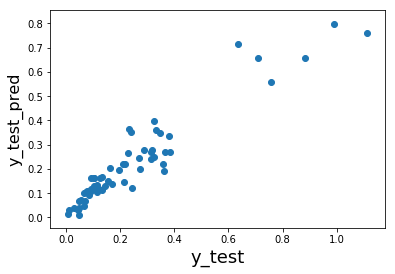

In [71]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)  

Text(0.5, 0.98, 'Error Terms')

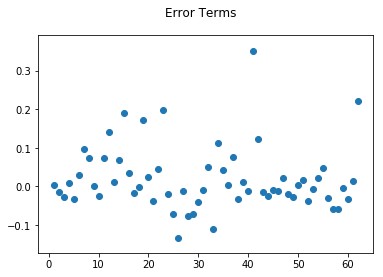

In [72]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_test_pred)
fig.suptitle('Error Terms')

Text(0.5, 0.98, 'Actual and Predicted')

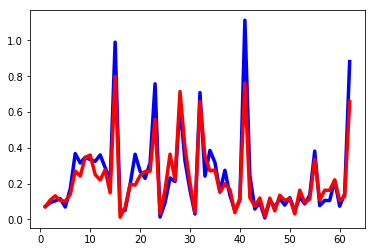

In [73]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             

### Inference

We can see that the equation of our best fitted line is:

price = (0.5426 x curbweight) + (0.0910 x carbody_convertible) + (-0.0837 x cylindernumber_four) + (0.2657 x HighEndCars) + 0.0259

- The deciding variables for this dataset are - curbweight, carbody_convertible, cylindernumber_four and HighEndCars.
- The R-sqaured value for training and test set are 0.903 and 0.868 respectively.